**加粗文字**# CEG5304 Project #1 for Master students

In this project, you are going to start an exciting journey to explore Deep Learning and Neural Networks by completing the following three tasks:

* **Task 1. Understanding and conducting convolution (8%).**
* **Task 2. Building and training a ResNet18 model (52%).**
* **Task 3. Exploring and explaining the trained model (40%).**

Before doing the project, please read the instructions carefully (failure to do so will be penalized):

1. Implement your codes **within** "TODO" and "END OF YOUR CODE", do **NOT** modify any codes outside the answer area;
2. Make sure your codes **clean**, **easily readable** (add meaningful comments if needed), and **runnable**;
3. Write your answers in the given markdown cells, keep your answers clear and concise;
4. Do submit your project on [Canvas](https://canvas.nus.edu.sg/) before the deadline: **5:59 pm (SGT), 1 March, 2024**;
5. Make sure that the **submitted notebooks have been run** and the **cell outputs are visible**.
6. This is an individual project, do **NOT** share your solutions with others, we have zero tolerance for cheating.

Note:

1. It is recommended to do model training on GPU, you may use [Colab](https://colab.google/) or [Kaggle](https://www.kaggle.com/) for free computing resources for faster training.
2. Since free computing resources accessible on [Colab](https://colab.google/) is limited for unsuscribed users for each day, it is recommended to debug on your CPU first.

## Task 1: Understanding and conducting convolution (8%)
**Subtasks**
1. Use numpy to conduct 2D standard convolution operation (4%).
2. Use numpy to conduct 2D dilated convolution operation (4%).

You may refer to *["A guide to convolution arithmetic for deeplearning"](https://arxiv.org/pdf/1603.07285.pdf)* for details of dilated convolution.

In this task, we follow the settings as in the paper:
* 2-D discrete convolutions,
* square inputs,
* square kernel size,
* same strides along both axes,
* same zero padding along both axes.

Score points:
1. The implementations are correct.
2. The implementation of dilated convolution makes use of the relationship between dilated convolution kernel and standard convolution kernel.

In [23]:
import numpy as np
import typing
import matplotlib.pyplot as plt

In [24]:
def conv2d(inputs: np.ndarray ,kernels: np.ndarray ,padding:int =0, stride:int =1) -> np.ndarray:
    assert inputs.shape[0] == kernels.shape[1], "The numbers of channels of input and kernel do not match."
    ##############################################################################
    # TODO: conduct convolution calculation based on given inputs, kernels,      #
    #       padding and stride values.                                           #
    ##############################################################################
    # your code
    # 提取维度信息
    channel, height, weight = inputs.shape
    f, kernel_channel, kernel_height, kernel_weight = kernels.shape

    # 根据填充和步长计算输出的维度
    output_height = (height - kernel_height + 2 * padding) // stride + 1
    output_weight = (weight - kernel_weight + 2 * padding) // stride + 1

    # 准备输出张量
    outputs:np.ndarray = np.zeros((f, output_height, output_weight))

    # 如有必要，对输入应用填充
    if padding > 0:
        inputs_padded = np.pad(inputs, ((0, 0), (padding, padding), (padding, padding)), mode='constant')
    else:
        inputs_padded = inputs

    # 执行卷积操作
    for i in range(output_height):
        for j in range(output_weight):
            for k in range(f):
                start_height = i * stride
                start_width = j * stride
                end_height = start_height + kernel_height
                end_width = start_width + kernel_weight
                window = inputs_padded[:, start_height:end_height, start_width:end_width]
                outputs[k, i, j] = np.sum(window * kernels[k])

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    return outputs

np.random.seed(42)
inputs = np.random.randint(0,3,size=(2,5,5))
kernels = np.random.randint(0,3,size=(3,2,2,2))
print(f"Inputs:\n{inputs}\n")
print(f"Kernels:\n{kernels}")

In [25]:
def dilated_conv2d(inputs,kernels,dilation,padding=0,stride=1):
    assert inputs.shape[0] == kernels.shape[1], "The numbers of channels of input and kernel do not match."
    ##############################################################################
    # TODO: conduct dilated convolution calculation based on given inputs,       #
    #       kernels, padding and stride values.                                  #
    ##############################################################################
    # your code
        # Extract dimensions
    c, h, w = inputs.shape
    f, _, hh, ww = kernels.shape
    h_out = (h + 2 * padding - (hh - 1) * dilation - 1) // stride + 1
    w_out = (w + 2 * padding - (ww - 1) * dilation - 1) // stride + 1

    if padding > 0:
        inputs_padded = np.pad(inputs, ((0, 0), (padding, padding), (padding, padding)), mode='constant')
    else:
        inputs_padded = inputs

    outputs = np.zeros((f, h_out, w_out))

    for i in range(h_out):
        for j in range(w_out):
            for k in range(f):
                for ii in range(hh):
                    for jj in range(ww):
                        h_index = i * stride + ii * dilation
                        w_index = j * stride + jj * dilation
                        if h_index < h + padding and w_index < w + padding:
                            inputs_slice = inputs_padded[:, h_index:h_index+1, w_index:w_index+1]
                            kernel = kernels[k, :, ii:ii+1, jj:jj+1]
                            outputs[k, i, j] += np.sum(inputs_slice * kernel)

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    return outputs

In [26]:
np.random.seed(24)
inputs:np.ndarray = np.random.randint(0,3,size=(2,5,5))
kernels:np.ndarray = np.random.randint(0,3,size=(3,2,2,2))


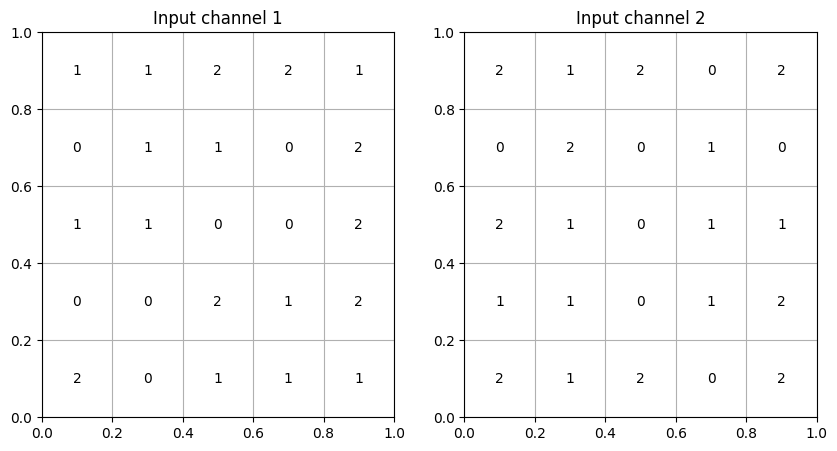

In [27]:
# visualize inputs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
for i in range(inputs.shape[0]):
    ax = fig.add_subplot(1, inputs.shape[0], i+1, xticks=[], yticks=[])
    ax.set_title('Input channel %s' % str(i+1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True)
    width = inputs[i].shape[0]
    height = inputs[i].shape[1]


    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=width))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=height))
    for x in range(width):
        for y in range(height):
            ax.annotate(str(inputs[i][x][y]), xy=(y/height+(0.5/height),x/width+(0.5/height)),
                        horizontalalignment='center',
                        verticalalignment='center')


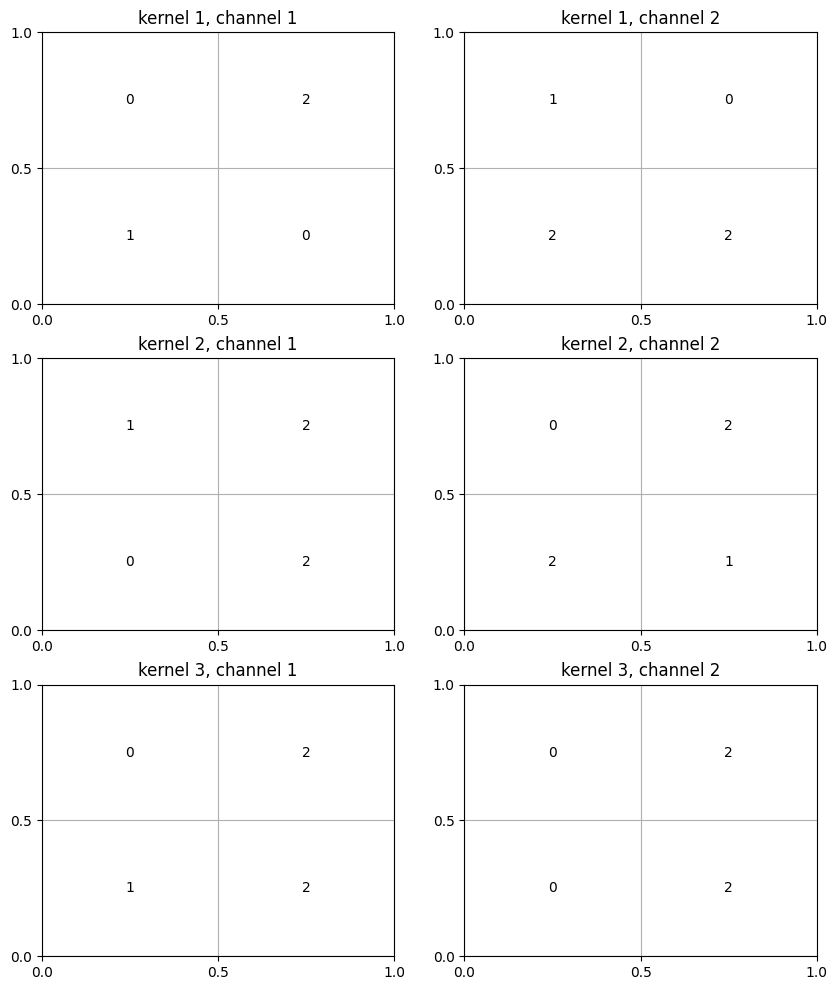

In [28]:
# visualize kernels
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 12))
for i in range(kernels.shape[0]):
    for j in range(kernels.shape[1]):
        ax = fig.add_subplot(kernels.shape[0], kernels.shape[1], i*kernels.shape[1] + j+1, xticks=[], yticks=[])
        ax.set_title(f'kernel {str(i+1)}, channel {str(j+1)}')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(True)
        width = kernels[i][j].shape[0]
        height = kernels[i][j].shape[1]


        ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=width))
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=height))
        for x in range(width):
            for y in range(height):
                ax.annotate(str(kernels[i][j][x][y]), xy=(y/height+(0.5/height),x/width+(0.5/height)),
                            horizontalalignment='center',
                            verticalalignment='center')

In [29]:
conv2d(inputs,kernels,stride=1)

array([[[ 9., 11.,  7., 10.],
        [ 8.,  3.,  4., 12.],
        [ 9.,  7.,  2.,  9.],
        [ 8., 10.,  9.,  4.]],

       [[ 7., 10., 12., 13.],
        [ 8.,  7.,  5., 14.],
        [13.,  5.,  4., 11.],
        [ 9., 15.,  7., 14.]],

       [[ 6., 10.,  7., 15.],
        [ 6.,  4.,  8., 15.],
        [11.,  3.,  4., 10.],
        [10., 11.,  7., 10.]]])

In [30]:
dilated_conv2d(inputs,kernels,dilation=2)

array([[[12.,  3., 13.],
        [ 4.,  6., 10.],
        [11., 10.,  6.]],

       [[ 9.,  7., 14.],
        [ 8.,  8., 11.],
        [13.,  8., 13.]],

       [[ 8.,  4., 13.],
        [ 6.,  6., 14.],
        [ 9.,  7., 12.]]])

## Task 2: Building and training a ResNet18 model (52%)
**Subtasks**
1. Figure out the ResNet18 model architecture and write down the dimension of features of each layer (4%).
2. Build a ResNet18 model by PyTorch (20%).
3. Complete the codes to evaluate and train the model. (10%)
4. Viusalize the training curves (2%).
5. Point out a potential problem in the training process (2%), propose possible solutions (4%) to improve and implement **at least ONE** of them (10%).

Score points:
1. The results for subtask 1 is correct.
2. The implementation for subtask 2 is correct.
3. The implementation for subtask 2 is also concise, i.e., building the network block by block instead of layer by layer.
4.
5. The two plots for visualization contain all information of interest, one for loss curves and another for accuracy curves.
6. The answers to subtask 5 are reasonable and the implementation is correct.


### Prepare packages and dataset

In [31]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import time

In [32]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_size = len(train_set)
print(train_size)
test_size = len(test_set)
print(test_size)

Files already downloaded and verified
Files already downloaded and verified
50000
10000


### Define the ResNet18 model

Residual Network (ResNet) is a deep learning model widely used for computer vision applications. It is a Convolutional Neural Network (CNN) architecture. ResNet provides an innovative solution to the vanishing gradient problem, known as “residual connections”.

ResNet includes multiple "residual blocks", each of which contains certain types of layers and residual connections as shown in the figure below.

Refer to the paper *["Deep Residual Learning for Image Recognition"](https://arxiv.org/pdf/1512.03385.pdf)* for information about ResNet architecture.

Figure out the architecture of ResNet18 and the feature dimension of each layer, considering the input dimension as `(3,32,32)` representing `(C, H, W)`. Write down the architecture and the feature dimension corresponding to each layer in the following markdown cell.

Implement to define a ResNet18 model in the following code block.

Note that while doing residual connection, if the dimensions of the input and output of the residual block are not the same, we adjust channels and resolution of the input by means of a convolution before adding.

![](resnet-block.svg)




---
**Write down your results of the ResNet18 architecture and specify the feature dimension for each layer.**

```

```

---

In [33]:
class ResidualBlock(nn.Module):
    def __init__(self, input_channels:int, num_channels:int,
                 strides:int=1):
        '''
        input_channels: the number of channels of input x.
        num_channels: the number of channels channels of the output of the residual block.
        strides: the strides for the first convolutional layer in the residual block,
                 note that this is not applied to the second convolutional layer in the residual block.
        '''
        ##############################################################################
        # TO DO: Define a ResidualBlock module as the figure shown above.            #
        ##############################################################################
        super(ResidualBlock, self).__init__()
        self.conv1:nn.Conv2d = nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1, stride=strides)
        self.conv2:nn.Conv2d = nn.Conv2d(num_channels, num_channels, kernel_size=3, padding=1)
        self.bn1:nn.BatchNorm2d = nn.BatchNorm2d(num_channels)
        self.bn2:nn.BatchNorm2d  = nn.BatchNorm2d(num_channels)
        self.downsample: typing.Optional[nn.Conv2d] = None
        if strides != 1 or input_channels != num_channels:
            self.downsample = nn.Conv2d(input_channels, num_channels, kernel_size=1, stride=strides)
        else:
            self.downsample = None
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

    def forward(self, X):
        ##############################################################################
        # TO DO: implement the forward path of the ResidualBlock module.             #
        ##############################################################################
        # Apply the first convolution, batch normalization, and ReLU
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.downsample:
            X = self.downsample(X)
        return F.relu(Y + X)
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

In [34]:
class ResNet18(nn.Module):
    ##############################################################################
    # TO DO: Define a ResNet18 model and implement its forward path, you may     #
    #        also add other functions to this class if necessary.                #
    ##############################################################################
    def __init__(self, num_classes=10):
        super(ResNet18, self).__init__()
        self.num_classes: int = num_classes
        self.conv1:nn.Conv2d = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,bias=False)
        self.bn1:nn.BatchNorm2d = nn.BatchNorm2d(64)
        self.relu:nn.ReLU = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.resnet_block1: ResidualBlock = ResidualBlock(64, 64)
        self.resnet_block2: ResidualBlock = ResidualBlock(64, 128, strides=2)
        self.resnet_block3: ResidualBlock = ResidualBlock(128, 256, strides=2)
        self.resnet_block4: ResidualBlock = ResidualBlock(256, 512, strides=2)
        self.avgpool: nn.AdaptiveAvgPool2d = nn.AdaptiveAvgPool2d((1, 1))
        self.fc: nn.Linear = nn.Linear(512, 10)

    def forward(self, X) -> torch.Tensor:
        X = self.avgpool(self.resnet_block4(self.resnet_block3(self.resnet_block2(self.resnet_block1(self.maxpool(self.relu(self.bn1(self.conv1(X)))))))))
        return self.fc(X.view(X.shape[0], -1))
    # your code
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

In [35]:
model = ResNet18()
model

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (resnet_block1): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (resnet_block2): ResidualBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(128, eps

### Train the model

In [36]:
# Hyperparameters
epochs = 10
batch_size = 256
learning_rate = 0.1

# Set up optimizer
optimizer:optim.SGD = optim.SGD(model.parameters(), lr=learning_rate)

# Define loss function
criterion: nn.CrossEntropyLoss = torch.nn.CrossEntropyLoss()

# Build data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader: torch.utils.data.dataloader.DataLoader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
data_loaders = {"train": train_loader, "test": test_loader}
dataset_sizes = {"train": train_size, "test": test_size}

Write a functions to evaluate the model on testing set and train the model for one epoch in the following code block.

In [37]:
def eval_on_test_set(model: nn.Module):
    model.eval()
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    model.to(device)
    running_accuracy: typing.Union[int, float] = 0
    loss: typing.Union[int, float]=0

    for data in test_loader:
        ##############################################################################
        # TODO: Implement the evaluation process on test set.                        #
        ##############################################################################
        # your code
        inputs:torch.Tensor = data[0]
        labels:torch.Tensor = data[1]
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss += criterion(outputs, labels).item()
        max_values, max_indices = torch.max(outputs, 1)
        running_accuracy += (max_indices == labels).sum().item()

        # print(f"type loss:{type(loss)}")
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
    total_loss=loss/test_size
    total_accuracy = running_accuracy / test_size
    print('Evaluation  on test set: loss{:.3f} \t accuracy = {:.2f}%'.format(total_loss, total_accuracy * 100))
    model.train()
    return total_loss, total_accuracy
# eval_on_test_set(model)


In [38]:
import traceback
def train_for_one_epoch(model: nn.Module):
    model.train()
    # Set up device
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    print(f"Using device {device} to train the model.")
    model.to(device)

    # set the running quatities to zero at the beginning of the epoch
    running_loss = 0
    running_accuracy = 0

    for data in train_loader:
        ##############################################################################
        # TODO: Implement the training process for one epoch.                        #
        ##############################################################################
        # your code
        optimizer.zero_grad()
        inputs:torch.Tensor = data[0]
        labels:torch.Tensor = data[1]
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss_tensor: torch.Tensor = criterion(outputs, labels)
        try:
            loss_tensor.backward()
            optimizer.step()
        except Exception as e:
            traceback.print_exc(e)
        running_loss += loss_tensor.item()
        max_values, max_indices = torch.max(outputs, 1)
        running_accuracy += (max_indices == labels).sum().item()
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

    # Compute stats for the full training set
    total_loss = running_loss / train_size
    total_accuracy = running_accuracy / train_size

    return total_loss, total_accuracy

In [39]:
# start training

metrics = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
for epoch in range(epochs):
  start=time.time()
  train_loss_epoch, train_acc_epoch = train_for_one_epoch(model)
  elapsed = (time.time()-start) / 60
  print('Training epoch= {} \t cost_time= {:.2f} min \t loss= {:.3f} \t accuracy= {:.2f}%'.format(epoch, elapsed, train_loss_epoch, train_acc_epoch * 100))
  test_loss_epoch, test_acc_epoch = eval_on_test_set(model)
  metrics['train_loss'].append(train_loss_epoch)
  metrics['train_acc'].append(train_acc_epoch)
  metrics['test_loss'].append(test_loss_epoch)
  metrics['test_acc'].append(test_acc_epoch)

# save your trained model for the following question
torch.save(model.state_dict(), './model_resnet18.pt')

Using device 0 to train the model.
Training epoch= 0 	 cost_time= 0.34 min 	 loss= 0.005 	 accuracy= 50.64%
Evaluation  on test set: loss0.005 	 accuracy = 53.57%
Using device 0 to train the model.
Training epoch= 1 	 cost_time= 0.32 min 	 loss= 0.004 	 accuracy= 66.42%
Evaluation  on test set: loss0.005 	 accuracy = 58.21%
Using device 0 to train the model.
Training epoch= 2 	 cost_time= 0.31 min 	 loss= 0.003 	 accuracy= 72.71%
Evaluation  on test set: loss0.005 	 accuracy = 57.41%
Using device 0 to train the model.
Training epoch= 3 	 cost_time= 0.35 min 	 loss= 0.002 	 accuracy= 77.93%
Evaluation  on test set: loss0.004 	 accuracy = 62.98%
Using device 0 to train the model.
Training epoch= 4 	 cost_time= 0.32 min 	 loss= 0.002 	 accuracy= 81.77%
Evaluation  on test set: loss0.005 	 accuracy = 61.53%
Using device 0 to train the model.
Training epoch= 5 	 cost_time= 0.33 min 	 loss= 0.002 	 accuracy= 85.15%
Evaluation  on test set: loss0.005 	 accuracy = 61.26%
Using device 0 to trai

Visualize the training curves for loss and accuracy in the following code block. Your figure should include two subplots, one for loss curves on training and testing sets, and another for accuracy curves on training and testing sets.

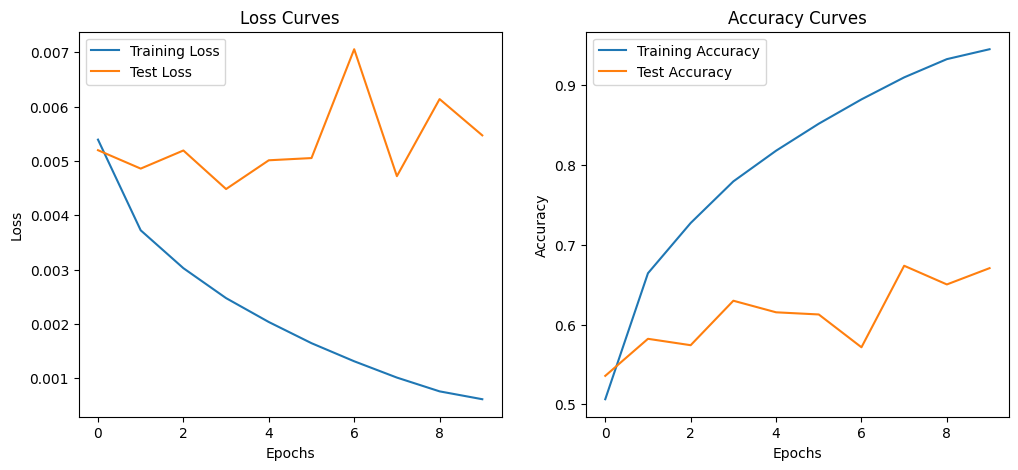

In [40]:
###############################################################################
# TODO: Visualize the loss curves and accuracy curves on training and         #
#       testing sets respectively during training.                            #
###############################################################################

# your code
plt.figure(figsize=(12, 5))

# Plot training and test loss
plt.subplot(1, 2, 1)
plt.plot(metrics['train_loss'], label='Training Loss')
plt.plot(metrics['test_loss'], label='Test Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(metrics['train_acc'], label='Training Accuracy')
plt.plot(metrics['test_acc'], label='Test Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Improve the ResNet18 trained above


Observe the loss and accuracy curves during training and testing respectively, what potential problem can be concluded if continue training the model for further epochs most probably? What kind of techniques can be applied to solve this problem?

In [49]:
##############################################################################
# TODO: Choose a technique to improve your model.                            #
##############################################################################

# your code
# transformer
from torchvision import datasets, transforms, utils


transform_augmented = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomErasing(),
])

# transform_augmented = transforms.Compose([
#     transforms.RandomHorizontalFlip(p=0.5),  # 以50%的概率随机水平翻转图像
#     transforms.RandomRotation(5),  # 随机旋转图像±5度，减小旋转角度以减少变化的强度
#     transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),  # 轻微调整图像的亮度、对比度和饱和度
#     transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),  # 减小平移的幅度
#     transforms.RandomCrop(32, padding=4),  # 在图像周围填充后进行随机裁剪，这是常见的数据增强技术，尤其是在CIFAR10数据集上
#     transforms.ToTensor(),  # 将图像转换为Tensor
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # 标准化图像
# ])
# # 定义使用数据增强的transform
# transform_augmented = transforms.Compose([
#     transforms.RandomResizedCrop(224), # randomly resize it to a given size.
#     transforms.RandomHorizontalFlip(),  # 随机水平翻转图像
#     transforms.RandomRotation(10),  # 随机旋转图像±10度
#     transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),  # 随机调整图像的亮度、对比度和饱和度
#     transforms.RandomAffine(0, translate=(0.01, 0.1)),  # 随机平移图像
#     transforms.ToTensor(),  # 将图像转换为Tensor
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # 标准化图像
# ])

# 使用增强的transform重新定义train_set
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)

# 使用原始transform定义test_set（测试集通常不需要数据增强）
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 使用增强的数据集重新创建DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

# 更新data_loaders和dataset_sizes字典以反映新的DataLoader
data_loaders = {"train": train_loader, "test": test_loader}
dataset_sizes = {"train": len(train_set), "test": len(test_set)}


# 设置数据增强
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# 加载CIFAR-10数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 定义简化版的ResNet模型
class SimpleResNet(nn.Module):
    def __init__(self):
        super(SimpleResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(64, 64, 2, stride=1)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)  # 添加Dropout层

    def _make_layer(self, in_channels, out_channels, blocks, stride):
        layers = []
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1))
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(1, blocks):
            layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)  # 应用Dropout
        x = self.fc(x)
        return x

# reset Model
model_boosted = SimpleResNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_boosted.parameters(), lr=0.001)

# start training

metrics = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
for epoch in range(epochs):
  start=time.time()
  train_loss_epoch, train_acc_epoch = train_for_one_epoch(model_boosted)
  elapsed = (time.time()-start) / 60
  print('Training epoch= {} \t cost_time= {:.2f} min \t loss= {:.3f} \t accuracy= {:.2f}%'.format(epoch, elapsed, train_loss_epoch, train_acc_epoch * 100))
  test_loss_epoch, test_acc_epoch = eval_on_test_set(model_boosted)
  metrics['train_loss'].append(train_loss_epoch)
  metrics['train_acc'].append(train_acc_epoch)
  metrics['test_loss'].append(test_loss_epoch)
  metrics['test_acc'].append(test_acc_epoch)

# save your trained model for the following question
torch.save(model_boosted.state_dict(), './model_resnet18_boosted.pt')


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using device 0 to train the model.
Training epoch= 0 	 cost_time= 0.49 min 	 loss= 0.022 	 accuracy= 47.23%
Evaluation  on test set: loss0.021 	 accuracy = 54.87%
Using device 0 to train the model.
Training epoch= 1 	 cost_time= 0.48 min 	 loss= 0.016 	 accuracy= 64.60%
Evaluation  on test set: loss0.015 	 accuracy = 66.64%
Using device 0 to train the model.
Training epoch= 2 	 cost_time= 0.47 min 	 loss= 0.013 	 accuracy= 71.48%
Evaluation  on test set: loss0.013 	 accuracy = 72.24%
Using device 0 to train the model.
Training epoch= 3 	 cost_time= 0.50 min 	 loss= 0.011 	 accuracy= 76.33%
Evaluation  on test set: loss0.011 	 accuracy = 77.22%
Using device 0 to train the model.
Training epoch= 4 	 cost_time= 0.47 min 	 loss= 0.009 	 accuracy= 79.44%
Evaluation  on test set: loss0.011 	 accuracy = 77.72%
Using device 0 to train the model

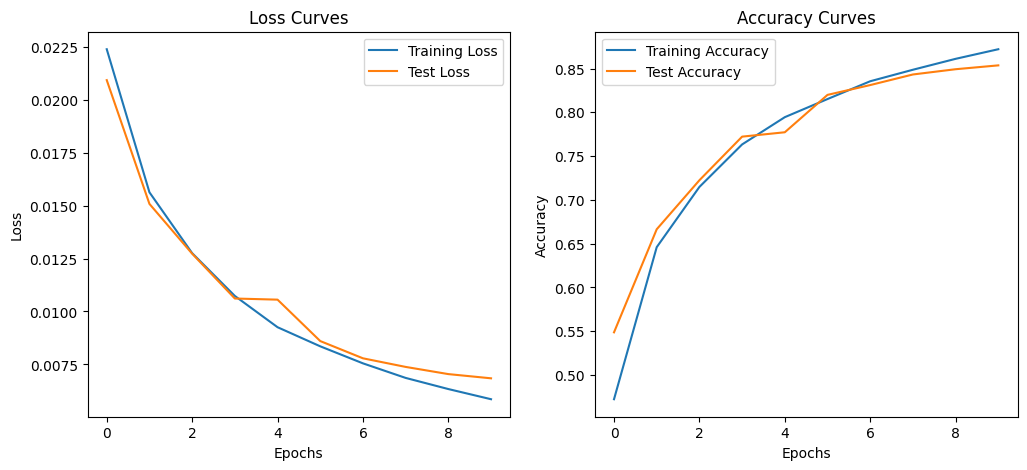

In [50]:
plt.figure(figsize=(12, 5))

# Plot training and test loss
plt.subplot(1, 2, 1)
plt.plot(metrics['train_loss'], label='Training Loss')
plt.plot(metrics['test_loss'], label='Test Loss')
plt.title('Loss Curves-Boosted')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(metrics['train_acc'], label='Training Accuracy')
plt.plot(metrics['test_acc'], label='Test Accuracy')
plt.title('Accuracy Curves-Boosted')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---
**Write your observations and analysis in this Markdown cell:**


```
```


---

In [51]:
# recover optimizer

optimizer:optim.SGD = optim.SGD(model.parameters(), lr=learning_rate)

# recover data set
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader: torch.utils.data.dataloader.DataLoader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
data_loaders = {"train": train_loader, "test": test_loader}
dataset_sizes = {"train": train_size, "test": test_size}

Please choose one technique you mentioned above and implement it, retrain the model, observe and report the loss and accuracy again (10%).

---
**Write your observations and analysis in this Markdown cell:**


```

```
---

## Task 3: Exploring and explaining the trained model (40%)

**Subtasks:**

1. Visualize the representations for bottom and top layers by t-SNE, compare and make conclusion (6%).
2. Compute saliency map and answer the question about it (6%).
3. Compute improved saliency map by SMOOTHGRAD and answer the question about the comparison between the saliency map in subtask 2 and SMOOTHGRAD (10%).
4. Design and conduct experiment to explain how CNN works using SMOOTHGRAD (12%).
5. Given a model, generate fooling image based on an original image and a target label to fool. Write down the observations from the result (6%).

Score points:
1. For subtask 1, recognize the correct layers of insterest, extract corresponding intermediate features and make reasonable conclusion.
2. For subtask 2, the implementation is correct and as concise as possible and the question is correctly answered.
3. For subtask 3, the implementation is correct and as concise as possible and the question is correctly answered.
4. For subtask 4, the experiment is reasonably designed and appropriately conducted.
5. For subtask 5, the implementation is correct and observation is reasonable.

**Note:** for task3, just use the model trained and saved in task2 part "define the ResNet18 model" instead your improved model in task2 part "improve the ResNet18".

### Load the trained ResNet18 model above.

In [ ]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.cm as cm
import torch.nn as nn
import os

trained_model = ResNet18()
assert os.path.exists('./model_resnet18.pt'), 'train the model first'
# Load the trained model
trained_model.load_state_dict(torch.load('./model_resnet18.pt', map_location=torch.device('cpu')))
device = torch.cuda.current_device() if torch.cuda.is_available() else 'cpu'
trained_model.to(device)
trained_model.eval()

### Visualize the learned features for the trained ResNet18 of different layers of model.

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Here, you shall apply t-SNE to the features extracted from a bottom layer and a top layer of the trained ResNet18 model.

You should complete:
* 1) extract features for the bottom layer and top layer respectively, i.e., the intermediate outputs of these layers.
* 2) if the extracted features are in form of feature maps, reshape the feature map for each sample to make it a vector.
* 3) visualize the features for the bottom and top layers by t-SNE, observe and analyze the results.

The bottom layer is defined as the first max-pooling layer of the whole model; the top layer is defined as the penultimate layer of the whole model. (We refer to the input side as "bottom" and the output side as "top".)

In [ ]:
##############################################################################
# TO DO: Extract intermediate features of the top and bottom layers          #
#        based on your ResNet18 model.                                       #
##############################################################################
# your code

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

features_top = np.array(features_top) # (10000,512)
print(features_top.shape)
features_bottom = np.array(features_bottom) # (10000,4096)
print(features_bottom.shape)
colors_per_class = cm.rainbow(np.linspace(0, 1, 11))

# Apply t-SNE to the features
features_top_tsne = TSNE(n_components=2, init='pca', random_state=42).fit_transform(features_top)
features_bottom_tsne = TSNE(n_components=2, init='pca', random_state=42).fit_transform(features_bottom)

# Plot the t-SNE visualization
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Bottom Layer')
for label in np.unique(labels):
    plt.scatter(features_bottom_tsne[labels == label, 0], features_bottom_tsne[labels == label, 1], label=classes[label], s=5)
plt.legend()
plt.subplot(1,2,2)
plt.title('Top Layer')
for label in np.unique(labels):
    plt.scatter(features_top_tsne[labels == label, 0], features_top_tsne[labels == label, 1], label=classes[label], s=5)
plt.legend()
plt.gcf().tight_layout()

plt.show()

---
**Write your observations and analysis in this Markdown cell:**

```

```

---

### Compute saliency map.

A saliency map tells us the degree to which each pixel in the image affects the classification score for that image. To compute it, we compute the gradient of the unnormalized score corresponding to the correct class (which is a scalar) with respect to the pixels of the image.

Read and understand the paper below, figure out how to compute saliency maps and implement it in the `compute_saliency_maps` function.

[Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman. "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", ICLR Workshop 2014.](https://arxiv.org/pdf/1312.6034.pdf)

In [ ]:
### helper function

def show_saliency_maps(X, y, saliency):
    # Compute saliency maps for images in X

    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    if saliency.dim() == 4:
      saliency = saliency.permute(0, 2, 3, 1).numpy()
    elif saliency.dim() == 3:
      saliency = saliency.numpy()
    N = X.shape[0]
    for i in range(N):
        plt.subplot(2, N, i + 1)
        img = np.transpose((X.detach()/2+0.5).numpy(),(0,2,3,1))
        plt.imshow(img[i])
        plt.axis('off')
        plt.title(classes[y.detach().numpy()[i]])
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(12, 5)
    plt.show()


In [ ]:
### example images for saliency map and SmoothGrad visualization

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(test_loader)
images,labels = next(dataiter)
X = images[-3:,:,:,:]
y = labels[-3:]

# show images
imshow(torchvision.utils.make_grid(X))
print('\t'.join(f'{classes[y[j]]:5s}' for j in range(3)))

In [ ]:
def compute_saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; Tensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # Make sure the model is in "test" mode
    model.eval()

    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image.                                                       #
    ##############################################################################
    # your code

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency

In [ ]:
saliency = compute_saliency_maps(X.to(device), y.to(device), model)
show_saliency_maps(X, y, saliency.cpu())

In order to find an image that maximizes the correct score, we can perform gradient ascent on the input image, can we use the saliency map instead of the gradient we in each step to update the image. Is this assertion true? Why or why not?

---
**Write your answer and reason in this Markdown cell.**

---

```

```

### Obtain improved visualiztion results by SmoothGrad.

SmoothGrad is a method that can help visually sharpen gradient-based saliency maps thus improve the visulization quality. *["SmoothGrad: removing noise by adding noise", ICML2017.](https://arxiv.org/pdf/1706.03825.pdf)*


Read and understand the paper, implement SmoothGrad and apply **at least ONE** visualization technique mentioned in the paper in the following code block to get better results.

You may also refer to this [blog](https://medium.com/@ML-STATS/reducing-noise-and-improving-interpretability-in-cnns-a-technical-review-of-the-smoothgrad-method-da648ee830c6) for concise illustration for SmoothGrad.


In [ ]:
from torch.autograd import Variable
def compute_smoothgrad(X, y, model, num_samples=50, stdev_spread=0.15):
    """
    Compute smoothed gradients for images in X given model

    Inputs:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; Tensor of shape (N,)
    - model: A pretrained CNN that will be used to compute gradients; see
      the torchvision library
    - num_samples: An integer; the number of gradient samples to compute for each
      input in X.
    - stdev_spread: A float; the standard deviation of the Gaussians used to
      smooth the gradients.

    Returns:
    - smoothgrad: saliency: A Tensor of shape (N, 3, H, W) giving the smoothed saliency maps for the input
    images.
    """

    # Make sure the model is in "test" mode
    model.eval()

    ################################################################################
    # TODO: Implement this function. Calculate SmoothGrad (smoothed saliency maps) #
    #       based on the given parameters for this function.                       #
    ################################################################################
    # your code


    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

      smoothgrad = (smoothgrad - smoothgrad.min()) / (smoothgrad.max() - smoothgrad.min())
    return smoothgrad



In [ ]:
smoothgrad = compute_smoothgrad(X.to(device), y.to(device), model)
show_saliency_maps(X, y, smoothgrad.cpu())

Compare the results of saliency map and SmoothGrad, what is your discovery? Try to understand the papers to give a reason for the phenomenon.

---

**Write your observations and analysis in this Markdown cell:**

---

```

```

### Design and conduct experiment  to explore and explain how CNN works.

Design and conduct one experiment beyond the example images above by utilizing ```compute_smoothgrad```, e.g., compare the SmoothGrad maps of different classes given the same model, compare the SmoothGrad maps of the same class for different models, etc. Please quanlitatively show some evidence (e.g., plotting some examplar images clearly and elegantly) with necessary code snippets, write down your observations and briefly explain.

For the experiment you design, please specify:
1. What question do you intend to study?
2. To study the proposed question, how do you design your experiment?
3. What conclusion do you make from the experiment results?

In [ ]:
##############################################################################
# TO DO: Design and conduct your experiment.                                 #
##############################################################################
# your code


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

---

**Write your observations and analysis in this Markdown cell:**

---

```

```

### Fooling image
We can also use image gradients to generate "fooling images", that is, given an image and a target class, we can perform gradient ascent over the image to maximize the target class, stopping when the network classifies the image as the target class. Implement the following function to generate fooling images.

In [ ]:
def make_fooling_image(X, target_y, model):
    """
    Generate a fooling image that is close to X, but that the model classifies
    as target_y.

    Inputs:
    - X: Input image; Tensor of shape (1, 3, H, W)
    - target_y: An integer in the range [0, 10)
    - model: A pretrained CNN

    Returns:
    - X_fooling: An image that is close to X, but that is classifed as target_y
    by the model.
    """
    # Initialize our fooling image to the input image, and make it require gradient
    X_fooling = X.clone()
    X_fooling = X_fooling.requires_grad_()

    learning_rate = 1
    ##############################################################################
    # TODO: Generate a fooling image X_fooling that the model will classify as   #
    # the class target_y. You should perform gradient ascent on the score of the #
    # target class, stopping when the model is fooled.                           #
    # When computing an update step, first normalize the gradient:               #
    #   dX = learning_rate * g / ||g||_2                                         #
    #                                                                            #
    # You should write a training loop.                                          #
    #                                                                            #
    # HINT: For most examples, you should be able to generate a fooling image    #
    # in fewer than 100 iterations of gradient ascent.                           #
    # You can print your progress over iterations to check your algorithm.       #
    ##############################################################################

    # your code

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return X_fooling

In [ ]:
target_y = 6 # label 'frog'
image_to_be_fooled = images[-1:,:,:,:] # an image of plane
y = labels[-1:] # label 'plane'

X_fooling = make_fooling_image(image_to_be_fooled.to(device), target_y, model.to(device))

scores = model(X_fooling)
assert target_y == scores.data.max(1)[1][0].item(), 'The model is not fooled!'

In [ ]:
org_img = (torch.squeeze(image_to_be_fooled, dim=0).detach().cpu().numpy()) / 2 + 0.5
fooling_img = (torch.squeeze(X_fooling, dim = 0).detach().cpu().numpy()) / 2 + 0.5

fooling_img.astype(np.uint8)

fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
plt.imshow(org_img.transpose((1, 2, 0)))
plt.title(classes[y])
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(fooling_img.transpose((1, 2, 0)))
plt.title(classes[target_y])
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow((org_img - fooling_img).transpose((1, 2, 0)))
plt.title('difference')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(10*(org_img - fooling_img).transpose((1, 2, 0)))
plt.title('magnified_difference')
plt.axis('off')

fig.show()

Observe the results above and write down your discovery.

---

**Write your observations and analysis in this Markdown cell:**

---

```

```